Dehaene's Consciousness and the Brain:

Now, the geometrical layout of the cells is such that, in the active ones, synaptic currents travel
from the superficial dendrites toward the cells’ bodies. Because all these neurons are parallel to one
another, their electrical currents add up, and, on the surface of the head, they create a slow negative
wave over the regions that encode the conscious stimulus. 42 The inhibited neurons, however, dominate
the picture—and their activity adds up to form a positive electrical potential. Because many more
neurons are inhibited than are activated, all these positive voltages end up forming a large wave on
the head—the P3 wave that we easily detect whenever conscious access occurs. 43 We have explained
our second signature of consciousness.

In [1]:
import nengo
import nengo_spa as spa
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

from model.modules import GWAssocMem

%matplotlib inline

# color-blind accessibility
from cycler import cycler
colors = ['#006BA4', '#FF800E', '#ABABAB', '#595959', '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']
default_cycler = cycler('color', colors)
plt.rc('axes', prop_cycle=(default_cycler))

n_choices = 2
vocab = spa.Vocabulary(96)
vocab.populate(';'.join(['D'+str(d+1) for d in range(n_choices)]))
SP_vs = np.array([vocab.parse(k).v for k in vocab.keys()])


In [2]:
with spa.Network() as model:
    
#     inp = nengo.Node(nengo.processes.FilteredNoise(.5), size_out=n_choices)
    inp = spa.Transcode(lambda t: str(t)+'*D2+.2*D1', output_vocab=vocab)
    # Selects information from the processors
    wta = GWAssocMem(
        input_vocab=vocab, 
        output_vocab=vocab,
        alpha=.2,
        mapping=vocab.keys(),
        n_neurons = 50,
        label='GW',
        seed=1,
    )
    nengo.Connection(inp.output, wta.input)
    
    inp_probe = nengo.Probe(inp.output, synapse=None)
    wta_probe = nengo.Probe(wta.output, synapse=.01)
    voltages = [nengo.Probe(ens.neurons, 'voltage', synapse=.01) for ens in wta.all_ensembles]
    spikes = [nengo.Probe(ens.neurons) for ens in wta.all_ensembles]
    
with nengo.Simulator(model) as sim:
    sim.run(1)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


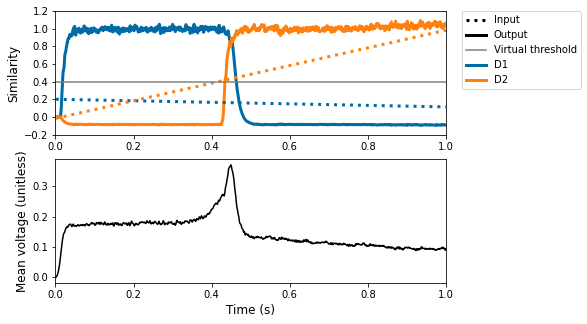

In [3]:
plt.figure(figsize=(7,5))
plt.subplot(2,1,1)

plt.plot(sim.trange(), spa.examine.similarity(sim.data[wta_probe], vocab), linewidth=3)
plt.gca().set_prop_cycle(None)
plt.plot(sim.trange(), spa.examine.similarity(sim.data[inp_probe], vocab), linewidth=3, linestyle='dotted')
plt.plot([], color='black', linewidth=3, label='Input', linestyle='dotted')
plt.plot([], color='black', linewidth=3, label='Output')
plt.plot([0,1],[.4,.4], color='gray', label='Virtual threshold')
plt.plot([], color=colors[0], linewidth=3, label='D1')
plt.plot([], color=colors[1], linewidth=3, label='D2')
# handles = [mpatches.Patch(color='black', linewidth=3, label='global workspace'), mpatches.Patch(color=tuple([0.7]*3), linewidth=0, label='input')]
plt.xlim(0,1)
plt.yticks(np.linspace(-.2,1.2,num=8))
plt.ylabel('Similarity', size=12)
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)

plt.subplot(2,1,2)
voltage_recordings = np.array([sim.data[data] for data in voltages]).mean(axis=(0,2))
plt.plot(sim.trange(), voltage_recordings, color='black')
plt.xlabel('Time (s)', size=12)
plt.ylabel('Mean voltage (unitless)', size=12)
plt.xlim(0,1)

plt.savefig('model/figures/gw_beha.eps', format='eps', bbox_inches='tight')
plt.show()

# spike_recordings = np.array([sim.data[data] for data in spikes]).mean(axis=(0,2))
# plt.plot(sim.trange(), spike_recordings)
# plt.show()

In [4]:
vocab = spa.Vocabulary(int(192*4))
vocab.populate('SEE; HEAR; REMEMBER; FEED; \
                CAT; DOG')#; A; B; C; D')
pairs = ['SEE*CAT','HEAR*CAT',
         'REMEMBER*DOG','FEED*DOG']
for pair in pairs:
    vocab.populate(pair.replace('*', '_')+'='+pair)
SP_vs = np.array([vocab.parse(k).v for k in pairs])
print(list(vocab.keys()))

['SEE', 'HEAR', 'REMEMBER', 'FEED', 'CAT', 'DOG', 'SEE_CAT', 'HEAR_CAT', 'REMEMBER_DOG', 'FEED_DOG']


In [5]:
with spa.Network() as model:
    
    inp = spa.Transcode(lambda t: str(t)+'*(DOG*REMEMBER+DOG*FEED)+.2*(CAT*HEAR+CAT*SEE)' if t<1.5 else "0", output_vocab=vocab)
    # Selects information from the processors
    wta = GWAssocMem(
        input_vocab=vocab, 
        output_vocab=vocab,
        alpha=.2,
        mapping=pairs,#+['A','B','C','D'],
        coalitions=((0,1), (2,3)),
        n_neurons = 100,
        label='GW',
        seed=1,
        tau=.005
    )
    nengo.Connection(inp.output, wta.input)
    
    inp_probe = nengo.Probe(inp.output, synapse=None)
    wta_probe = nengo.Probe(wta.output, synapse=.01)
    voltages = [nengo.Probe(ens.neurons, 'voltage', synapse=.01) for ens in wta.all_ensembles]
    spikes = [nengo.Probe(ens.neurons) for ens in wta.all_ensembles]
    
with nengo.Simulator(model) as sim:
    sim.run(2)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


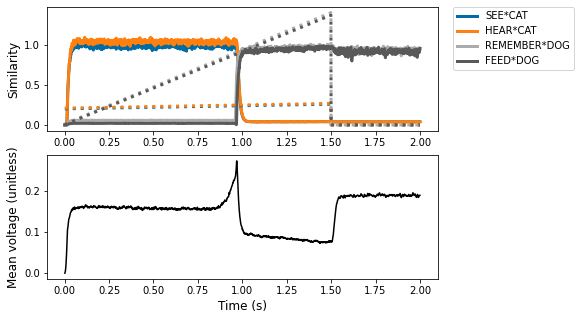

In [6]:
plt.figure(figsize=(7,5))
plt.subplot(2,1,1)

plt.plot(sim.trange(), spa.examine.similarity(sim.data[wta_probe], SP_vs), linewidth=3)
plt.gca().set_prop_cycle(None)
plt.plot(sim.trange(), spa.examine.similarity(sim.data[inp_probe], SP_vs), linewidth=3, linestyle='dotted')
plt.plot([], color='black', linewidth=3, label='Input', linestyle='dotted')
plt.plot([], color='black', linewidth=3, label='Output')
# plt.plot([0,1],[.4,.4], color='gray', label='Virtual threshold')
# plt.plot([], color=colors[0], linewidth=3, label='D1')
# plt.plot([], color=colors[1], linewidth=3, label='D2')
# handles = [mpatches.Patch(color='black', linewidth=3, label='global workspace'), mpatches.Patch(color=tuple([0.7]*3), linewidth=0, label='input')]
# plt.xlim(0,1)
# plt.yticks(np.linspace(-.2,1.2,num=8))
plt.ylabel('Similarity', size=12)
plt.legend(pairs, bbox_to_anchor=(1.04,1), borderaxespad=0)

plt.subplot(2,1,2)
voltage_recordings = np.array([sim.data[data] for data in voltages]).mean(axis=(0,2))
plt.plot(sim.trange(), voltage_recordings, color='black')
plt.xlabel('Time (s)', size=12)
plt.ylabel('Mean voltage (unitless)', size=12)
# plt.xlim(0,1)

plt.savefig('model/figures/gw_coalition.eps', format='eps', bbox_inches='tight')
plt.show()

# spike_recordings = np.array([sim.data[data] for data in spikes]).mean(axis=(0,2))
# plt.plot(sim.trange(), spike_recordings)
# plt.show()